<a href="https://colab.research.google.com/github/taniajasmin/Machine-Learning-Basic-Projects/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install scikit-learn pandas matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Load data

In [ ]:
import kagglehub

path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 2.08MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [ ]:
# import pandas as pd
# import os

os.listdir(path)

['Mall_Customers.csv']

In [ ]:
df = pd.read_csv(os.path.join(path, "Mall_Customers.csv"))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40,
 None)

Scaling them (important for KMeans)

In [ ]:
features = ['Age','Annual Income (k$)','Spending Score (1-100)']
X_raw = df[features]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

print("Scaled shape:", X.shape)

Scaled shape: (200, 3)


Finding best k

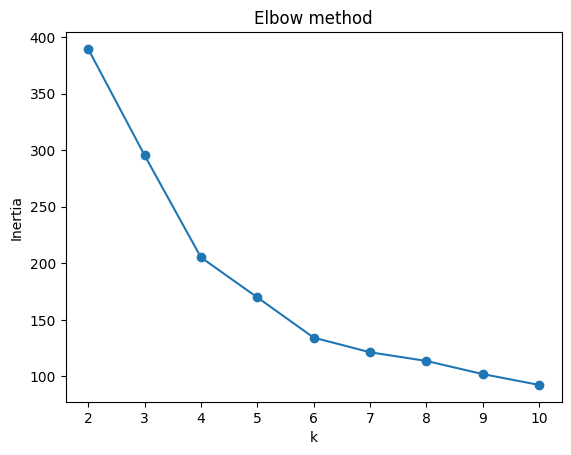

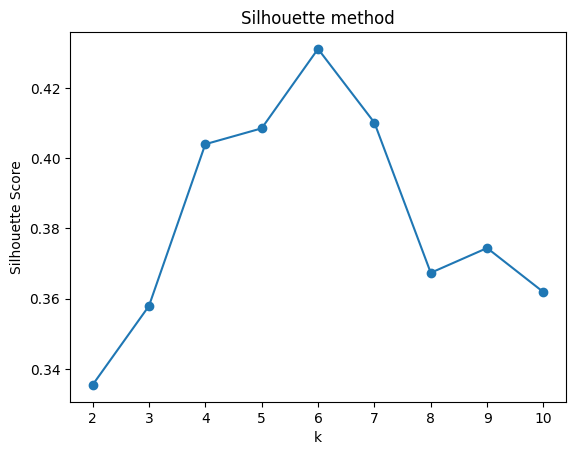

    k     inertia  silhouette
0   2  389.386189    0.335472
1   3  295.456245    0.357923
2   4  205.225147    0.403958
3   5  169.891498    0.408469
4   6  134.352775    0.431065
5   7  121.389350    0.410091
6   8  113.727230    0.367366
7   9  102.136238    0.374421
8  10   92.550272    0.361870


In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

inertia, sil, Ks = [], [], range(2, 11)

for k in Ks:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(X)
    inertia.append(km.inertia_)
    sil.append(silhouette_score(X, labels))

# Plot elbow
plt.figure()
plt.plot(Ks, inertia, marker='o')
plt.xlabel("k"); plt.ylabel("Inertia"); plt.title("Elbow method")
plt.show()

# Plot silhouette
plt.figure()
plt.plot(Ks, sil, marker='o')
plt.xlabel("k"); plt.ylabel("Silhouette Score"); plt.title("Silhouette method")
plt.show()

print(pd.DataFrame({"k":Ks,"inertia":inertia,"silhouette":sil}))

KMeans with k=6

In [ ]:
# from sklearn.cluster import KMeans

k = 6
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
df['cluster'] = kmeans.fit_predict(X)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


Visualize clusters (Income vs Spending)

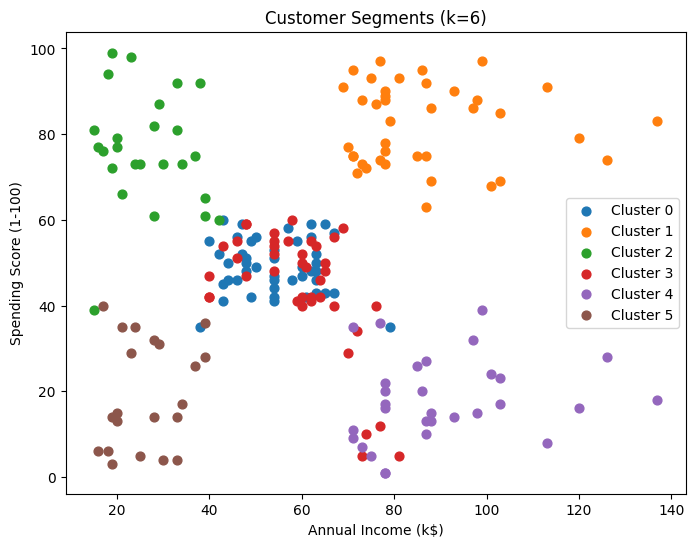

In [ ]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for c in sorted(df['cluster'].unique()):
    d = df[df['cluster']==c]
    plt.scatter(d['Annual Income (k$)'], d['Spending Score (1-100)'], s=40, label=f'Cluster {c}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (k=6)')
plt.legend()
plt.show()

In [ ]:
summary = (df.groupby('cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']]
             .mean()
             .round(1)
             .sort_values('Spending Score (1-100)', ascending=False))
summary

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
1,32.7,86.5,82.1
2,25.6,26.5,76.2
0,56.3,54.3,49.1
3,26.1,59.4,44.4
5,45.5,26.3,19.4
4,44.0,90.1,17.9


## Clusterring result

Cluster 0: Middle-Aged, Average Income & Spending

- Avg Age: ~56
- Income: ~54k
- Spending Score: ~49
- Balanced group, neither high nor low spenders. - Focused on practical, family-oriented products.

Cluster 1: High-Income and High-Spenders

- Avg Age: ~33
- Income: ~86k
- Spending Score: ~82
- VIP customers — Target for VIP programs, exclusive offers, luxury products.

Cluster 2: Young Low-Income but High-Spenders

- Avg Age: ~26
- Income: ~26k
- Spending Score: ~76
- Customers with limited income. - Attracted to discounts, trendy/affordable items, loyalty points.

Cluster 3: Young, Moderate Income, Moderate Spenders”

- Avg Age: ~26
- Income: ~59k
- Spending Score: ~44
- Budget-conscious young adults. - Target with value-for-money deals, installment offers, and mid-tier products.

Cluster 5: Older Low-Income, Low-Spenders

- Avg Age: ~45
- Income: ~26k
- Spending Score: ~19
- Cost-sensitive group. - Focus on essentials, discount campaigns, loyalty benefits.

Cluster 4: Older High-Income, Low-Spenders

- Avg Age: ~44
- Income: ~90k
- Spending Score: ~18
- Wealthy but cautious. - Marketing needs to build trust (premium quality, strong brand reputation, long-term value products).

In [ ]:
# from sklearn.cluster import DBSCAN
# import numpy as np
# import matplotlib.pyplot as plt

In [ ]:
for eps in [0.4, 0.6, 0.8, 1.0, 1.2]:
    db = DBSCAN(eps=eps, min_samples=5).fit(X)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"eps={eps} → clusters={n_clusters}, noise points={n_noise}")

eps=0.4 → clusters=6, noise points=98
eps=0.6 → clusters=2, noise points=28
eps=0.8 → clusters=1, noise points=6
eps=1.0 → clusters=1, noise points=2
eps=1.2 → clusters=1, noise points=0


For this dataset, DBSCAN is not very effective.

- DBSCAN works best with irregular clusters separated by gaps, but here customers are distributed in continuous bands.
- KMeans is the better choice for this dataset.

Visualize DBSCAN (eps=0.4)

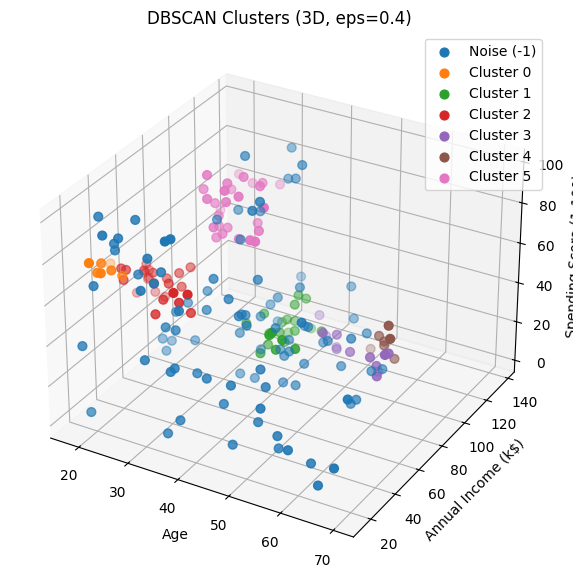

In [ ]:
eps = 0.4
db = DBSCAN(eps=eps, min_samples=5).fit(X)
df['dbscan'] = db.labels_

# 3D DBSCAN visualization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

for c in sorted(df['dbscan'].unique()):
    d = df[df['dbscan']==c]
    label = 'Noise (-1)' if c==-1 else f'Cluster {c}'
    ax.scatter(d['Age'], d['Annual Income (k$)'], d['Spending Score (1-100)'], s=40, label=label)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title(f'DBSCAN Clusters (3D, eps={eps})')
ax.legend()
plt.show()